In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


C:\Users\Vineet\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("Data/Trip_by_month_hour.csv")

In [3]:
temp = df[['month','hour','Fare','Trip Total','Trip Seconds']].groupby(['month','hour']).agg({'Fare':'median',\
                                                                                              'Trip Total':'median',\
                                                                                              'Trip Seconds':'median'})


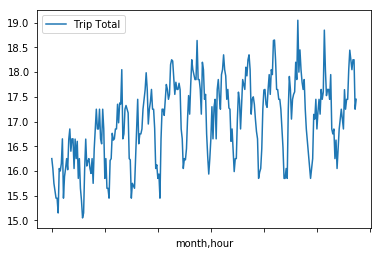

In [4]:
temp[['Trip Total']].plot()

In [5]:
values = temp[['Fare','Trip Total','Trip Seconds']].values

Fare_HM = pd.DataFrame(data = values, index = [i for i in range(len(values))],\
             columns = ['Fare','Trip Total','Trip Seconds'])

In [6]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window = 24)
    rolstd = pd.rolling_std(timeseries, window = 24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  """


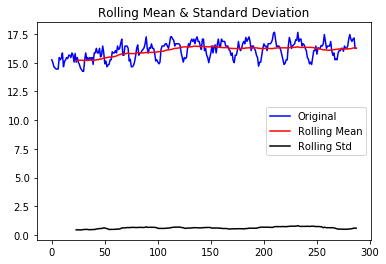

Results of Dickey-Fuller Test:
Test Statistic                  -3.565125
p-value                          0.006464
#Lags Used                      13.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64


In [7]:
ts = Fare_HM['Fare']
test_stationarity(ts)

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  


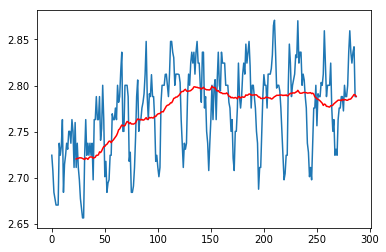

In [8]:
ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log,24)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  """


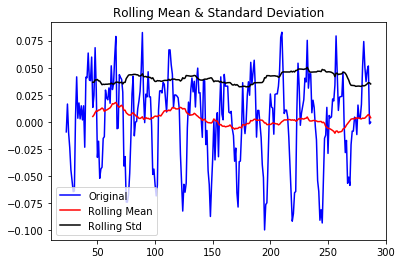

Results of Dickey-Fuller Test:
Test Statistic                -7.679406e+00
p-value                        1.518021e-11
#Lags Used                     1.500000e+01
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [9]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

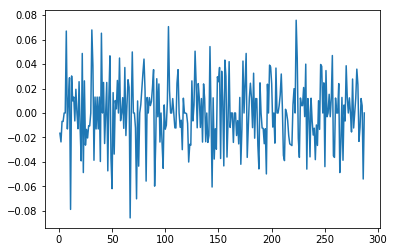

In [10]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  """


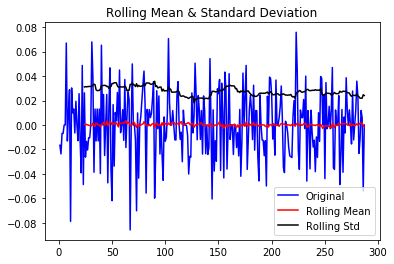

Results of Dickey-Fuller Test:
Test Statistic                -7.767357e+00
p-value                        9.112729e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.710000e+02
Critical Value (1%)           -3.454713e+00
Critical Value (5%)           -2.872265e+00
Critical Value (10%)          -2.572485e+00
dtype: float64


In [11]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

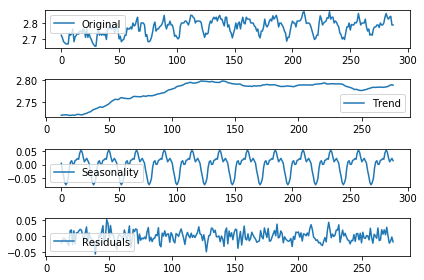

In [12]:
decomposition = seasonal_decompose(ts_log.values, freq = 24)

decomposition = pd.DataFrame({'trend':decomposition.trend,\
                              'seasonal':decomposition.seasonal,\
                              'residual':decomposition.resid})

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.residual

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  """


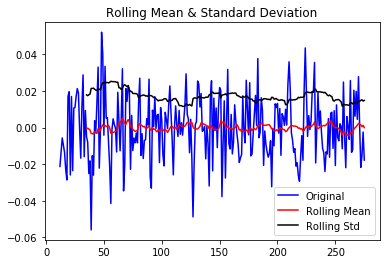

Results of Dickey-Fuller Test:
Test Statistic                -7.137602e+00
p-value                        3.389030e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


In [13]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [14]:
nlags = 20
lag_acf = acf(ts_log_diff, nlags = nlags)
lag_pacf = pacf(ts_log_diff, nlags = nlags, method='ols')

Text(0.5,1,'Partial Autocorrelation Function')

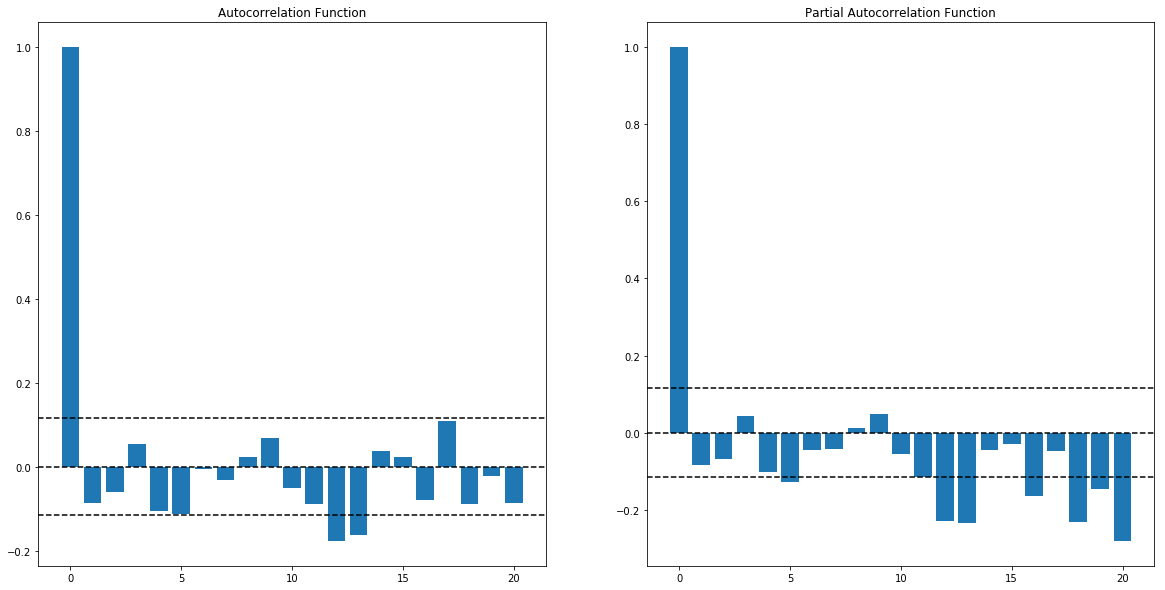

In [15]:
x=[i for i in range(nlags+1)]
#Plot ACF:
plt.figure(figsize=(nlags,10))
plt.subplot(121) 
plt.bar(x,lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.bar(x,lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

In [16]:
np.where(abs(lag_acf) >= 1.96/np.sqrt(len(ts)))

(array([ 0, 12, 13], dtype=int64),)

In [17]:
np.where(abs(lag_pacf) >= 1.96/np.sqrt(len(ts)))

(array([ 0,  5, 12, 13, 16, 18, 19, 20], dtype=int64),)

C:\Users\Vineet\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Vineet\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Vineet\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Vineet\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check m

Text(0.5,1,'RSS: 0.1468')

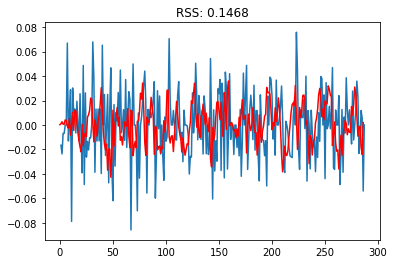

In [18]:
model = ARIMA(ts_log.values, order=(12, 1, 5))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [19]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

0    0.000256
1    0.001329
2    0.003908
3    0.004580
4    0.005227
dtype: float64


In [20]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    2.724836
1    2.725908
2    2.728488
3    2.729159
4    2.729807
dtype: float64

Text(0.5,1,'RMSE: 2.7874')

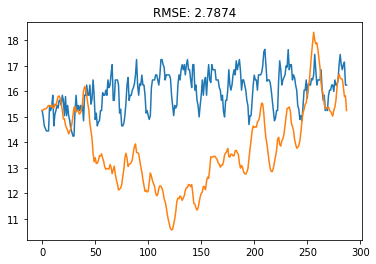

In [21]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))

Text(0.5,1,'Predictions for 12 samples')

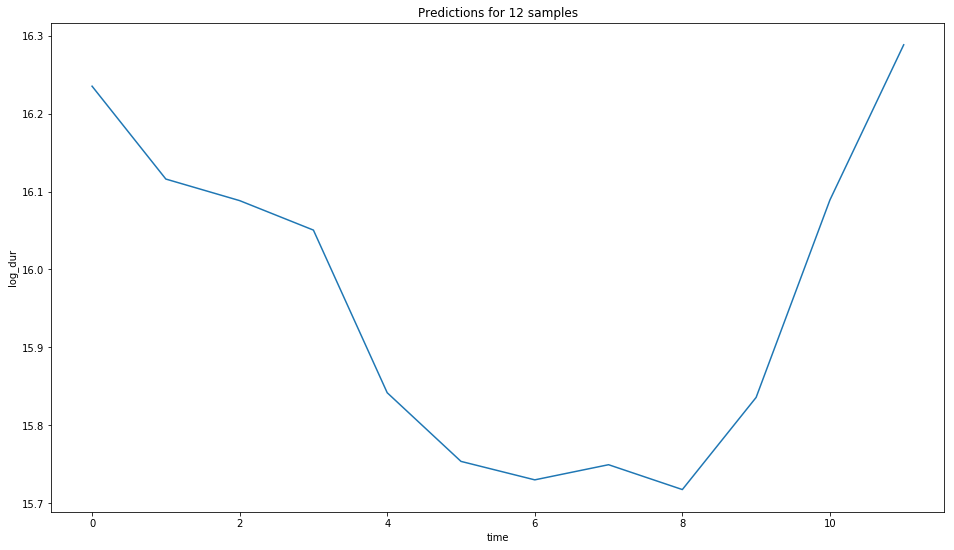

In [22]:
predicted_ARIMA_diff = results_ARIMA.forecast(steps=12)[0]
plt.figure(figsize = (16,9))
plt.plot(np.exp(predicted_ARIMA_diff))
plt.xlabel("time")
plt.ylabel("log_dur")
plt.title("Predictions for %i samples"%len(predicted_ARIMA_diff))